# DATA DIRI

In [1]:
# Data Diri
print("Nama : Michael Sihotang")
print("NIM  : 18221054")

Nama : Michael Sihotang
NIM  : 18221054


In [4]:
# import modul yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy.stats import norm
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

In [5]:
# import dataset
df = pd.read_excel("18221054.xlsx")

In [6]:
# sampling data
df_sample = df.sample(10)

In [7]:
df_sample

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
189,Pria,21,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,600%,Ya,Akses media sosial,Mobile Banking,...,Transfer via ATM,NaN,NaN,menggunakan fitur Paylater,NaN,NaN,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,Saldo eMoney/ eWallet berkurang tanpa melakuka...
260,Wanita,49,S1,Ibu Rumah Tangga,NaN,Tangerang,600%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,Jumlah barang yang diterima kurang,NaN,NaN
183,Wanita,21,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Surabaya,800%,Ya,Akses media sosial,NaN,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
84,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bogor,600%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
75,Wanita,19,S1,Pelajar / Mahasiswa,< Rp 2 juta,Cirebon,1000%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
76,Pria,36,S1,Karyawan Swasta,> Rp 10 juta,Medan,500%,Sama saja,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
169,Pria,19,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Bandung,800%,NaN,Berbelanja online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
185,Wanita,47,S2,Karyawan Swasta,> Rp 10 juta,Jakarta,1000%,Tidak,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
272,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Malang,NaN,Ya,akses google docs untuk mencatat dan youtube/p...,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Pria,16,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,NaN,Tidak,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.DataFrame(enumerate(df.columns)).to_excel('col1.xlsx')

In [9]:
# ukuran data
df.shape

(300, 150)

In [10]:
# jumlah responden
Responden = df.shape[0]
Responden

300

# SOLUSI

### Nomor 1

Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi jenis kelamin responden.

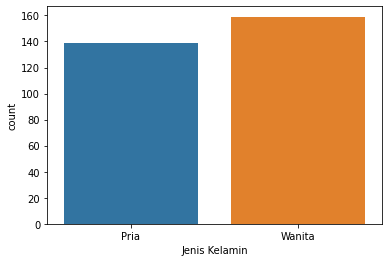

In [11]:
# Perbedaan frekuensi/proporsi jenis kelamin responden
sns.countplot(data = df, x = 'Jenis Kelamin')

### Nomor 2

Buat tabel frekuensi dan proporsi untuk jenis kelamin responden.

In [12]:
# Tabel frekuensi dan proporsi untuk jenis kelamin responden
proporsi_JK = pd.DataFrame(df.iloc[:,0].value_counts()).reset_index()
proporsi_JK.columns = ['Jenis Kelamin','Frekuensi']
Frekuensi_Total = proporsi_JK['Frekuensi'].sum()
proporsi_Wanita = proporsi_JK['Frekuensi'][0] / Frekuensi_Total
proporsi_Pria = proporsi_JK['Frekuensi'][1] / Frekuensi_Total
proporsi_JK['Proporsi'] = [proporsi_Wanita,proporsi_Pria]
proporsi_JK

,Jenis Kelamin,Frekuensi,Proporsi
0,Wanita,159,0.533557
1,Pria,139,0.466443


### Nomor 3

Buat histogram untuk data umur responden.

In [13]:
Usia = pd.DataFrame(df.iloc[:,1]).reset_index()
cond = Usia['Usia'] > 1000.0
Usia.loc[cond,'Usia'] = 2022 - Usia['Usia']
df.loc[cond,'Usia'] = 2022 - df['Usia']
Usia['Usia'].unique()

array([31, 24, 21, 19, 49, 23, 45, 18, 42, 20, 47, 41, 54, 56, 14, 36, 34,
       30, 17, 48, 32, 26, 40, 53, 22, 50, 44, 51, 43, 39, 52, 61, 38, 28,
       57, 29, 59, 25, 27, 46, 16, 63, 58, 33, 60, 35])

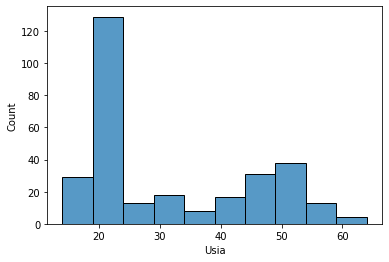

In [14]:
# Histogram untuk data umur responden
sns.histplot(data = Usia, x = 'Usia', bins = 10,binwidth = 5)
plt.show()

### Nomor 4

Buat boxplot untuk data umur responden.

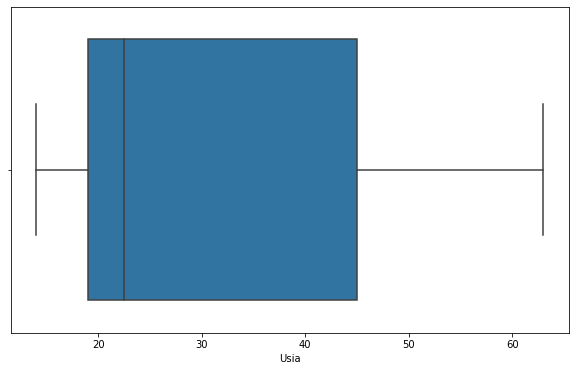

In [15]:
# Boxplot untuk data umur responden
plt.figure(figsize = (10,6))
sns.boxplot(data = Usia, x = 'Usia')
plt.show()

### Nomor 5

Identifikasi nilai mean, Q1, Q2/median, Q3, min, max dari data umur responden.

In [16]:
data5 = df["Usia"].describe()

print("Rata-rata dari umur responden \t:", data5["mean"])
print("Q1 dari umur responden \t\t:", data5["25%"])
print("Q2 dari umur responden \t\t:", data5["50%"])
print("Q3 dari umur responden \t\t:", data5["75%"])
print("Min dari umur responden\t\t:", data5["min"])
print("Max dari umur responden\t\t:", data5["max"])

Rata-rata dari umur responden 	: 30.846666666666668
Q1 dari umur responden 		: 19.0
Q2 dari umur responden 		: 22.5
Q3 dari umur responden 		: 45.0
Min dari umur responden		: 14.0
Max dari umur responden		: 63.0


### Nomor 6

Apakah terdapat outlier pada data umur responden. (Definisi outlier : < Q1 – 1.5 IQR atau > Q3 + 1.5 IQR; IQR = Q3 – Q1).

In [20]:
IQR = data5["75%"] - data5["25%"]
print((data5["25%"] - 1.5 * IQR), "< outliers <",  (data5["75%"] + 1.5 * IQR))

-20.0 < outliers < 84.0


### Nomor 7

Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi profesi responden.

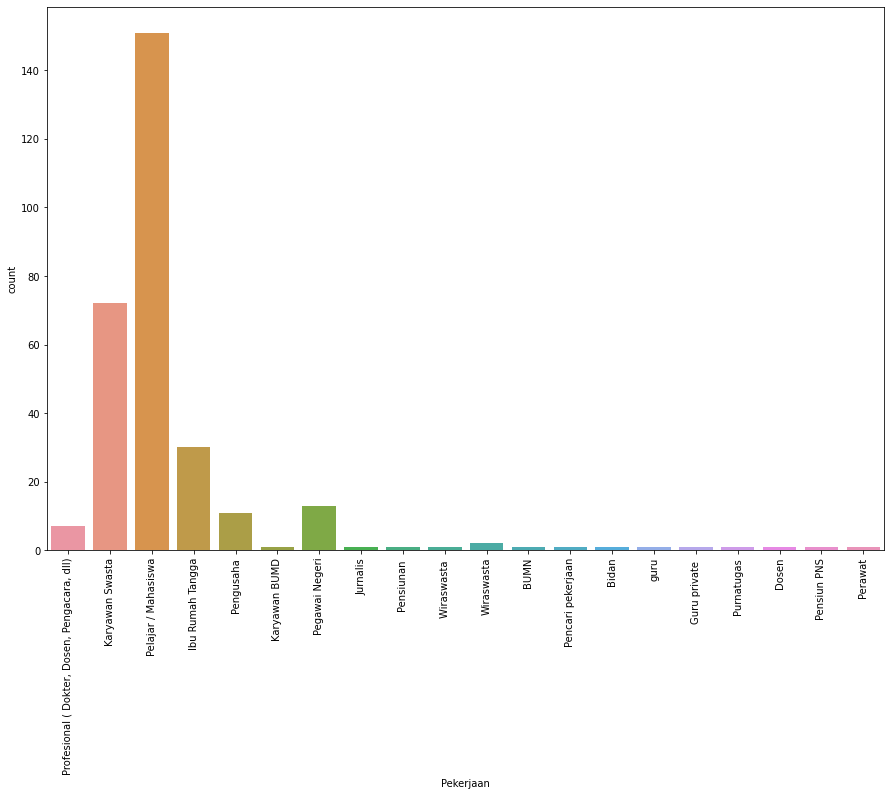

In [21]:
# Bar chart untuk menunjukkan perbedaan frekuensi / proporsi profesi responden
fig , ax = plt.subplots(figsize = (15,10))
sns.countplot(data = df, x = 'Pekerjaan', ax = ax)
plt.xticks(rotation=90)
plt.show()

### Nomor 8

Buat tabel frekuensi dan proporsi untuk profesi responden.

In [22]:
# Tabel frekuensi dan proporsi untuk profesi responden
proporsi_profesi = pd.DataFrame(df.iloc[:,3].value_counts()).reset_index()
proporsi_profesi.columns = ['Pekerjaan','Frekuensi']
Frekuensi_Total = proporsi_profesi['Frekuensi'].sum()
proporsi_profesi['proporsi'] = proporsi_profesi['Frekuensi']/Frekuensi_Total
proporsi_profesi

,Pekerjaan,Frekuensi,proporsi
0,Pelajar / Mahasiswa,151,0.505017
1,Karyawan Swasta,72,0.240803
2,Ibu Rumah Tangga,30,0.100334
3,Pegawai Negeri,13,0.043478
4,Pengusaha,11,0.036789
5,"Profesional ( Dokter, Dosen, Pengacara, dll)",7,0.023411
6,Wiraswasta,2,0.006689
7,Jurnalis,1,0.003344
8,Pensiunan,1,0.003344
9,Wiraswasta,1,0.003344


### Nomor 9

Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir.

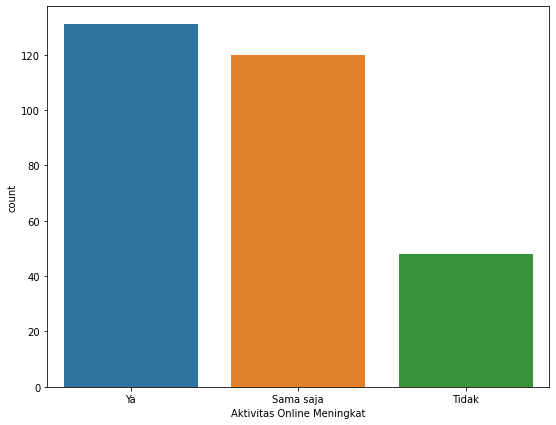

In [23]:
# Bar chart untuk menunjukkan perbedaan frekuensi / proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir
fig , ax = plt.subplots(figsize = (9,7))
sns.countplot(data = df, x='Aktivitas Online Meningkat',ax=ax)
plt.show()

### Nomor 10

Buat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir.

In [24]:
# Tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir
proporsi_aktivitias_online = pd.DataFrame(df.iloc[:,7].value_counts()).reset_index()
proporsi_aktivitias_online.columns = ['Aktivitas Online Meningkat','Frekuensi']
Frekuensi_Total = proporsi_aktivitias_online['Frekuensi'].sum()
proporsi_aktivitias_online['Proporsi'] = proporsi_aktivitias_online['Frekuensi']/Frekuensi_Total
proporsi_aktivitias_online

,Aktivitas Online Meningkat,Frekuensi,Proporsi
0,Ya,131,0.438127
1,Sama saja,120,0.401338
2,Tidak,48,0.160535


### Nomor 11 dan Nomor 12

Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7.


Buat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7.

In [25]:
# Preview sejumlah kolom bank menjadi satu tabel frekuensi
bank = df.iloc[:,15:22]
bank

,bank_1,bank_2,bank_3,bank_4,bank_5,bank_6,bank_7
0,Bank BNI,Bank Mandiri,Bank BCA,NaN,Bank BRI,NaN,NaN
1,Bank BNI,NaN,Bank BCA,NaN,NaN,NaN,NaN
2,Bank BNI,NaN,Bank BCA,Bank CIMB Niaga,NaN,NaN,NaN
3,NaN,Bank Mandiri,NaN,NaN,NaN,NaN,NaN
4,Bank BNI,NaN,NaN,NaN,Bank BRI,NaN,NaN
...,...,...,...,...,...,...,...
295,NaN,NaN,Bank BCA,NaN,NaN,NaN,NaN
296,NaN,NaN,Bank BCA,NaN,NaN,NaN,NaN
297,Bank BNI,NaN,NaN,NaN,Bank BRI,NaN,NaN
298,NaN,Bank Mandiri,NaN,NaN,NaN,NaN,NaN


In [27]:
# Menggabungkan semua kolom bank menjadi satu data
a = []
for col in bank.columns :
    a += list(df[col])
proporsi_bank = pd.DataFrame(pd.Series(a).value_counts()).reset_index()
proporsi_bank.columns = ['Bank','Frekuensi']
proporsi_bank['Proporsi'] = proporsi_bank['Frekuensi']/Responden
proporsi_bank

,Bank,Frekuensi,Proporsi
0,Bank BCA,175,0.583333
1,Bank Mandiri,88,0.293333
2,Bank BNI,73,0.243333
3,Bank BRI,63,0.210000
4,Bank CIMB Niaga,13,0.043333
5,Bank Permata,8,0.026667
6,Bank BTN,7,0.023333


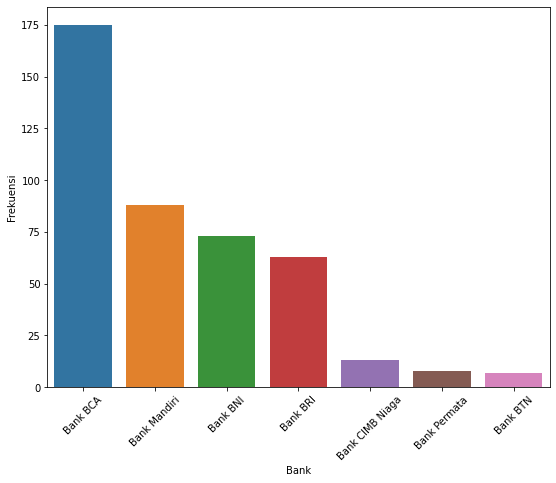

In [28]:
# Bar chart yang perbandingan frekuensi/proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7
fig , ax = plt.subplots(figsize = (9,7))
sns.barplot(data = proporsi_bank, x = 'Bank', y='Frekuensi',ax=ax)
plt.xticks(rotation=45)
plt.show()

### Nomor 13

Hitung confidence interval 95% untuk proporsi pengguna Bank BCA.

In [29]:
p_BCA = float(proporsi_bank["Proporsi"].loc[proporsi_bank["Bank"] == "Bank BCA"])
q_BCA = 1 - p_BCA
n_BCA = proporsi_bank["Frekuensi"].sum()
alpha_BCA = 1 - 0.95
z_alpha_BCA = st.norm.ppf(1 - alpha_BCA/2, loc = 0, scale = 1)
e_BCA = z_alpha_BCA * m.sqrt((p_BCA * q_BCA) / n_BCA)
print(f"Confidence interval 95% untuk proporsi pengguna Bank BCA:\n{round(p_BCA - e_BCA, 5)} < pBCA < {round(p_BCA + e_BCA, 5)}")

Confidence interval 95% untuk proporsi pengguna Bank BCA:
0.53657 < pBCA < 0.63009


### Nomor 14

Lakukan uji hipotesis berikut : 

H0 : pBCA = 0.5

H1 : pBCA != 0.5

alpha = 5%

In [30]:
p0_BCA = 0.5
q0_BCA = 1 - p0_BCA
z_BCA = (n_BCA * p_BCA - n_BCA * p0_BCA) / m.sqrt(n_BCA * p0_BCA * (q0_BCA))
print(f"Critical region\t: z < {round(-z_alpha_BCA, 5)} atau z > {round(z_alpha_BCA, 5)}")
print(f"Z\t\t: {round(z_BCA, 5)}")
print("Kesimpulan\t:", end = " ")
if (z_BCA < -z_alpha_BCA or z_BCA > z_alpha_BCA) :
  print("H0 berhasil ditolak")
else :
  print("H0 gagal ditolak")
print(f"P Value\t\t: {2 * (1 - st.norm.cdf(abs(z_BCA), loc = 0, scale = 1))}")

Critical region	: z < -1.95996 atau z > 1.95996
Z		: 3.444
Kesimpulan	: H0 berhasil ditolak
P Value		: 0.0005731833624416094


### Nomor 15

Buat bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”.

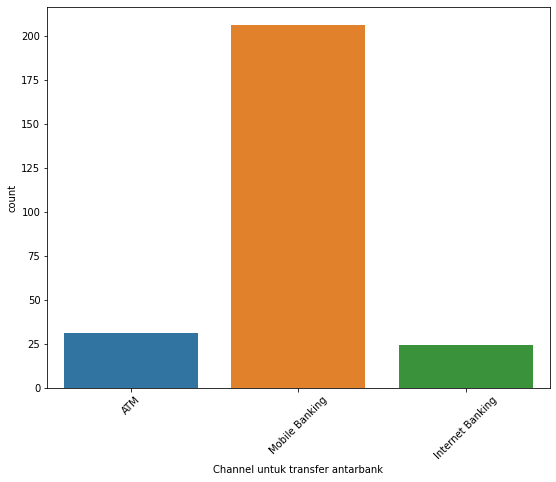

In [31]:
# Bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”
fig , ax = plt.subplots(figsize = (9,7))
sns.countplot(data = df, x='19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]',ax=ax)
plt.xlabel("Channel untuk transfer antarbank")
plt.xticks(rotation=45)
plt.show()

### Nomor 16

Buat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”.

In [32]:
# Tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”
proporsi_channel_tfbank = pd.DataFrame(df.iloc[:,30].value_counts()).reset_index()
proporsi_channel_tfbank.columns = ['Channel untuk transfer antarbank','Frekuensi']
Frekuensi_Total = proporsi_channel_tfbank['Frekuensi'].sum()
proporsi_channel_tfbank['Proporsi'] = proporsi_channel_tfbank['Frekuensi']/Frekuensi_Total
proporsi_channel_tfbank

,Channel untuk transfer antarbank,Frekuensi,Proporsi
0,Mobile Banking,206,0.789272
1,ATM,31,0.118774
2,Internet Banking,24,0.091954


### Nomor 17 dan Nomor 18

Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)

Buat tabel frekuensi dan proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)

In [33]:
# Priview sejumlah kolom emoney menjadi satu tabel frekuensi
emoney = df.iloc[:,37:44]
emoney

,emoney_pilihan_1,emoney_pilihan_2,emoney_pilihan_3,emoney_pilihan_4,emoney_pilihan_5,emoney_pilihan_6,emoney_pilihan_7
0,NaN,NaN,NaN,NaN,eMoney Mandiri,NaN,NaN
1,NaN,ShopeePay,NaN,NaN,NaN,NaN,NaN
2,GoPay,ShopeePay,OVO,Dana,NaN,Flazz BCA,LinkAja
3,NaN,NaN,OVO,NaN,eMoney Mandiri,NaN,NaN
4,GoPay,ShopeePay,OVO,Dana,NaN,NaN,NaN
...,...,...,...,...,...,...,...
295,GoPay,NaN,NaN,NaN,eMoney Mandiri,Flazz BCA,NaN
296,GoPay,NaN,OVO,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,GoPay,ShopeePay,NaN,Dana,NaN,NaN,NaN


In [35]:
# Menggabungkan semua kolom bank menjadi satu dataframe
b = []
for col in emoney.columns :
    b += list(df[col])
    
proporsi_emoney = pd.DataFrame(pd.Series(b).value_counts()).reset_index()
proporsi_emoney.columns = ['E-money','Frekuensi']

Frekuensi_Total = proporsi_emoney['Frekuensi'].sum()

proporsi_emoney['Proporsi'] = proporsi_emoney['Frekuensi']/Responden
proporsi_emoney

,E-money,Frekuensi,Proporsi
0,GoPay,223,0.743333
1,ShopeePay,171,0.570000
2,OVO,169,0.563333
3,Dana,117,0.390000
4,eMoney Mandiri,94,0.313333
5,Flazz BCA,70,0.233333
6,LinkAja,45,0.150000


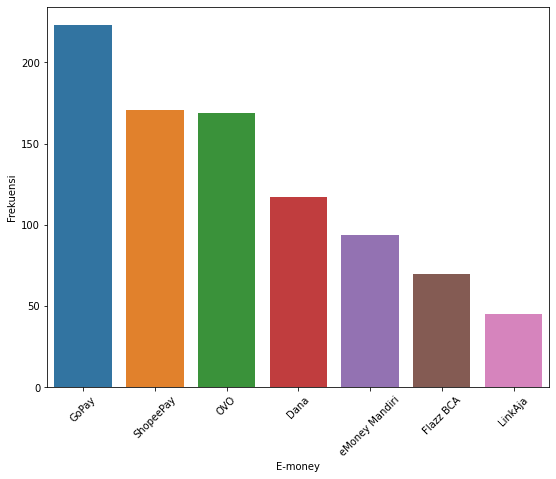

In [36]:
# Bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai emoney_pilihan_7
fig , ax = plt.subplots(figsize = (9,7))
sns.barplot(data = proporsi_emoney, x = 'E-money', y='Frekuensi',ax=ax)
plt.xticks(rotation=45)
plt.show()

### Nomor 19

Hitung confidence interval 95% untuk selisih proporsi pengguna Gopay dan OVO.

In [37]:
p_gopay = float(proporsi_emoney["Proporsi"].loc[proporsi_emoney["E-money"] == "GoPay"])
q_gopay = 1 - p_gopay
p_ovo = float(proporsi_emoney["Proporsi"].loc[proporsi_emoney["E-money"] == "OVO"])
q_ovo = 1 - p_ovo
n_emoney = proporsi_emoney["Frekuensi"].sum()
alpha_emoney = 1 - 0.95
z_alpha_emoney = st.norm.ppf(1 - alpha_emoney/2, loc = 0, scale = 1)
e_emoney = z_alpha_emoney * m.sqrt(((p_gopay * q_gopay) / n_emoney) + ((p_ovo * q_ovo) /n_emoney))
print(f"Confidence interval 95% untuk proporsi pengguna Gopay dan OVO.:\n{round(p_gopay - p_ovo - e_emoney, 5)} < pGoPay - pOVO < {round(p_gopay - p_ovo + e_emoney, 5)}")

Confidence interval 95% untuk proporsi pengguna Gopay dan OVO.:
0.13656 < pGoPay - pOVO < 0.22344


### Nomor 20

Lakukan uji hipotesis berikut : 

H0 : pGopay = pOVO

H1 : pGopay > pOVO

alpha = 5%

In [38]:
x_gopay = float(proporsi_emoney["Frekuensi"].loc[proporsi_emoney["E-money"] == "GoPay"])
x_ovo = float(proporsi_emoney["Frekuensi"].loc[proporsi_emoney["E-money"] == "OVO"])

p_hat_emoney = (x_gopay + x_ovo) / (2 * n_emoney)

z_emoney = (p_gopay - p_ovo) / m.sqrt(p_hat_emoney * (1 - p_hat_emoney) * (2 / n_emoney))

print(f"Critical region\t: z > {round(z_alpha_emoney, 5)}")
print(f"Z\t\t: {round(z_emoney, 5)}")
print("Kesimpulan\t:", end = " ")

if (z_emoney > z_alpha_emoney) :
  print("H0 berhasil ditolak")
else :
  print("H0 gagal ditolak")

print(f"P Value\t\t: {1 - st.norm.cdf(z_emoney, loc = 0, scale = 1)}")

Critical region	: z > 1.95996
Z		: 9.1541
Kesimpulan	: H0 berhasil ditolak
P Value		: 0.0


### Nomor 21 dan Nomor 22

Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk nominal yang biasa dipakai untuk top up emoney.

Buat tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up emoney.

In [39]:
# Tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up emoney
proporsi_nominal_topup = pd.DataFrame(df.iloc[:,70].value_counts()).reset_index()
proporsi_nominal_topup.columns = ['Nominal Top up E-money','Frekuensi']
Frekuensi_Total = proporsi_nominal_topup['Frekuensi'].sum()
proporsi_nominal_topup['Proporsi'] = proporsi_nominal_topup['Frekuensi']/Frekuensi_Total

custom_dict = {'< Rp 25.000,-':0,'Rp 25.000 – Rp 50.000,-': 1,'Rp 50.001 – Rp 100.000':2,'Rp 150.001 – Rp 300.000':3,'Rp 100.001 – Rp 150.000':4,'> Rp 300.000':5}

proporsi_nominal_topup.sort_values(by=['Nominal Top up E-money','Frekuensi'], key = lambda x : x.map(custom_dict), inplace = True)
proporsi_nominal_topup

,Nominal Top up E-money,Frekuensi,Proporsi
5,"< Rp 25.000,-",5,0.017921
4,"Rp 25.000 – Rp 50.000,-",35,0.125448
0,Rp 50.001 – Rp 100.000,82,0.293907
3,Rp 150.001 – Rp 300.000,50,0.179211
1,Rp 100.001 – Rp 150.000,55,0.197133
2,> Rp 300.000,52,0.186380


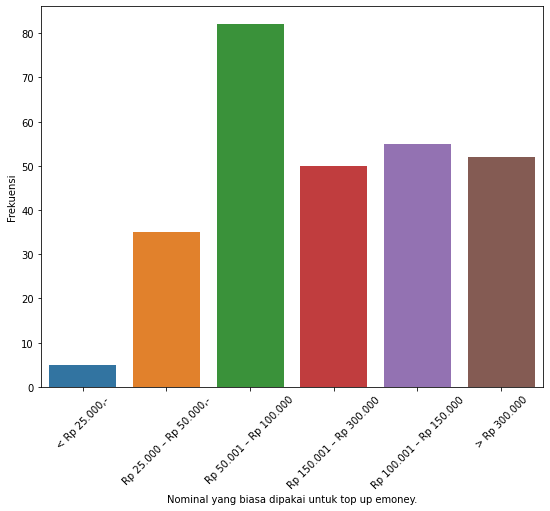

In [40]:
# Bar Chart nominal yang biasa dipakai untuk top up emoney
fig , ax = plt.subplots(figsize = (9,7))
sns.barplot(data = proporsi_nominal_topup, x='Nominal Top up E-money', y = 'Frekuensi',ax=ax)
plt.xlabel("Nominal yang biasa dipakai untuk top up emoney.")
plt.xticks(rotation=45)
plt.show()

### Nomor 23 dan Nomor 24

Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)

Buat tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)

In [41]:
# preview sejumlah kolom emoney menjadi 1 tabel frekuensi
ecommerce = df.iloc[:,116:123]
ecommerce

,ecommerce_pilihan_1,ecommerce_pilihan_2,ecommerce_pilihan_3,ecommerce_pilihan_4,ecommerce_pilihan_5,ecommerce_pilihan_6,ecommerce_pilihan_7
0,Shopee,Gojek (GoFood,NaN,Grab (GrabFood,NaN,NaN,NaN
1,Shopee,NaN,NaN,Grab (GrabFood,Traveloka,NaN,NaN
2,Shopee,Gojek (GoFood,Tokopedia,Grab (GrabFood,NaN,NaN,NaN
3,Shopee,NaN,Tokopedia,Grab (GrabFood,NaN,NaN,NaN
4,Shopee,Gojek (GoFood,NaN,Grab (GrabFood,NaN,NaN,NaN
...,...,...,...,...,...,...,...
295,Shopee,Gojek (GoFood,Tokopedia,NaN,NaN,NaN,NaN
296,Shopee,Gojek (GoFood,NaN,Grab (GrabFood,NaN,NaN,NaN
297,Shopee,NaN,NaN,NaN,Traveloka,NaN,NaN
298,Shopee,NaN,Tokopedia,NaN,NaN,NaN,NaN


In [43]:
# Tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7
c = []
for col in ecommerce.columns :
    c += list(df[col])
    
proporsi_ecommerce = pd.DataFrame(pd.Series(c).value_counts()).reset_index()
proporsi_ecommerce.columns = ['E-commerce','Frekuensi']

Frekuensi_Total = proporsi_ecommerce['Frekuensi'].sum()

proporsi_ecommerce['Proporsi'] = proporsi_ecommerce['Frekuensi']/Responden
proporsi_ecommerce

,E-commerce,Frekuensi,Proporsi
0,Shopee,223,0.743333
1,Gojek (GoFood,207,0.690000
2,Tokopedia,180,0.600000
3,Grab (GrabFood,121,0.403333
4,Traveloka,42,0.140000
5,Lazada,33,0.110000
6,Tiket.com,31,0.103333


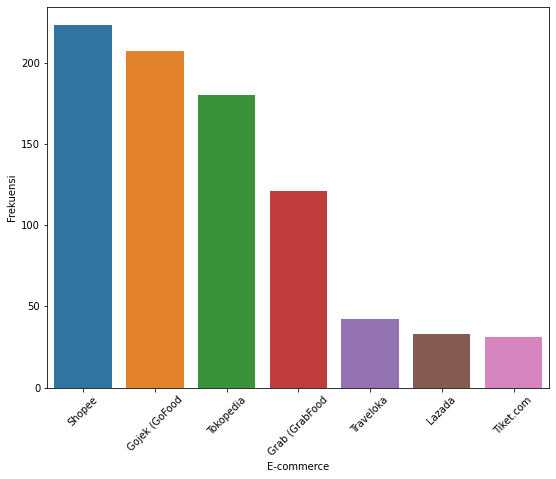

In [44]:
# Bar chart perbandingan frekuensi / proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7
fig , ax = plt.subplots(figsize = (9,7))
sns.barplot(data = proporsi_ecommerce, x = 'E-commerce', y='Frekuensi',ax=ax)
plt.xticks(rotation=45)
plt.show()

### Nomor 25

Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk responden yang prefer beli handphone secara offline vs online

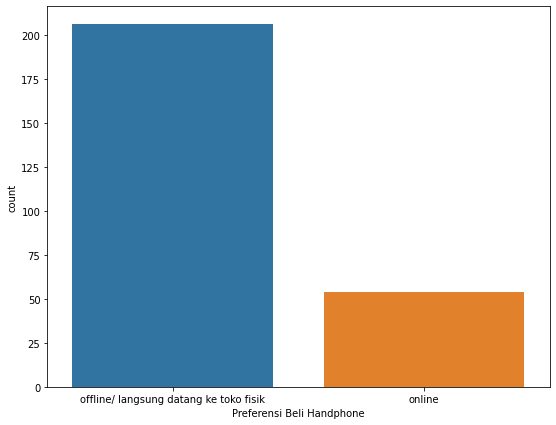

In [45]:
# Bar chart untuk menunjukkan perbedaan frekuensi / proporsi untuk responden yang prefer beli handphone secara offline vs online
fig , ax = plt.subplots(figsize = (9,7))
sns.countplot(data = df, x='47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone]',ax=ax)
plt.xlabel("Preferensi Beli Handphone")
plt.show()

### Nomor 26

Buat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara offline vs online

In [46]:
# Tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara offline vs online
proporsi_beli_HP = pd.DataFrame(df.iloc[:,99].value_counts()).reset_index()
proporsi_beli_HP.columns = ['Preferensi Beli Handphone','Frekuensi']
Frekuensi_Total = proporsi_beli_HP['Frekuensi'].sum()
proporsi_beli_HP['Proporsi'] = proporsi_beli_HP['Frekuensi']/Frekuensi_Total
proporsi_beli_HP

,Preferensi Beli Handphone,Frekuensi,Proporsi
0,offline/ langsung datang ke toko fisik,206,0.792308
1,online,54,0.207692


### Nomor 27

Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk tempat beli makanan online yang pilihan responden

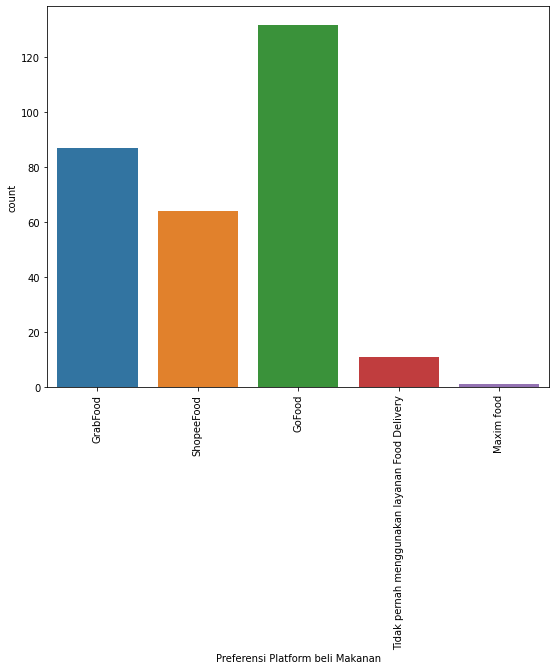

In [47]:
# Bar chart untuk menunjukkan perbedaan frekuensi / proporsi untuk tempat beli makanan online yang pilihan responden
fig , ax = plt.subplots(figsize = (9,7))
sns.countplot(data = df, x='50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?',ax=ax)
plt.xlabel("Preferensi Platform beli Makanan")
plt.xticks(rotation=90)
plt.show()

### Nomor 28

Buat tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan responden.

In [48]:
# Tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan responden
proporsi_platform_beli_makanan = pd.DataFrame(df.iloc[:,128].value_counts()).reset_index()
proporsi_platform_beli_makanan.columns = ['Preferensi Platform beli Makanan','Frekuensi']
Frekuensi_Total = proporsi_platform_beli_makanan['Frekuensi'].sum()
proporsi_platform_beli_makanan['Proporsi'] = proporsi_platform_beli_makanan['Frekuensi']/Frekuensi_Total
proporsi_platform_beli_makanan

,Preferensi Platform beli Makanan,Frekuensi,Proporsi
0,GoFood,132,0.447458
1,GrabFood,87,0.294915
2,ShopeeFood,64,0.216949
3,Tidak pernah menggunakan layanan Food Delivery,11,0.037288
4,Maxim food,1,0.003390


### Nomor 29

Lakukan One Way ANOVA Test berikut:

H0 : Mean umur pengguna gofood = mean umur pengguna grabfood = mean umur
pengguna shopeefood

H1 : Setidaknya ada dua grup yang memiliki mean umur yang berbeda

alpha : 5%

In [49]:
usia = df[["Usia", "50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"]]
usia = usia.rename(columns={"50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?": "Layanan"})
usia = usia.loc[(usia["Layanan"] == "GoFood") | (usia["Layanan"] == "GrabFood") | (usia["Layanan"] == "ShopeeFood")]
usia.reset_index()
alpha = 0.05
dfn = len(usia["Layanan"].value_counts()) - 1
dfd = len(usia) - 1 - dfn
f_alpha = st.f.ppf(1 - alpha, dfn, dfd)
print("Critical region\t: F >", round(f_alpha,5))
aov = pg.anova(dv='Usia', between='Layanan', data=usia, detailed = True)
F = aov.iat[0,4]
p_val = aov.iat[0,5]
print("F\t\t:", round(F,5))
print("Kesimpulan\t: ", end='')
if (F > f_alpha):
    print("H0 berhasil ditolak")
else:
    print("H0 gagal ditolak")
print("P value\t\t:", p_val)

Critical region	: F > 3.02801
F		: 5.31252
Kesimpulan	: H0 berhasil ditolak
P value		: 0.005438784895277512


### Nomor 30

Tuliskan minimal 5 insights/pelajaran dari hasil pengolahan data responden.

1. Dari 300 responden terdapat 159 wanita dan 139 pria dengan rata-rata umur responden sekitar 30 tahun. Dari responden yang ada, sebagian besar adalah mahasiswa/pelajar diikuti oleh karyawan swasta dan ibu rumah tangga. 

2. Dari data yang ada diperoleh bahwa terjadi peningkatan aktivitas online dari responden tetapi tidak jauh beda dengan aktivitas online yang sama saja dengan proporsi yang meningkat adalah 0.44 dan yang sama saja adalah 0.40. 

3. Dari data yang ada dapat dilihat bahwa bank BCA adalah bank yang paling banyak digunakan diikuti oleh bank Mandiri dan bank BNI. Bank BCA memeroleh proporsi yang jauh lebih tinggi dibaning bank lain yaitu 0.58 dan diikuti oleh bank Mandiri 0.29.

4. Dari data yang ada, responden lebih banyak memilik mobile banking untuk melakukan transfer antar bank. Perbedaan dengan ATM dan Internet Banking sangat jauh. Proporsi untuk mobile banking adalah 0.79 dan diikuti oleh ATM 0.12 dan Internet Banking 0.09. Hal ini tentu saja karena mobile banking jauh lebih instan dibanding yang lain. 

5. Dari data yang ada, penggunaan emoney sangat tersebar karena beberapa emoney digunakan oleh responden. Untuk emoney ini, GoPay menjadi pilihan responden yang paling banyak dengan proporsi 0.74 dan diikuti oleh ShopeePay dan OVO. Dengan adanya gopay tentu saja responden sangat terbantu baik untuk membeli makanan, bepergian, pembayaran non tunai, dll. 

6. Dari data yang ada, responden lebih banyak melakukan top up sebesar 50.001 - 100.000. Nominal ini cukup kecil karena masih kebanyakan transaksi dilakukan dengan tunai dan beberapa responden tidak selalu menggunakan emoney dalam kehidupan sehari-hari. 

7. E-commerce yang paling banyak digunakan oleh responden adalah shopee diikuti oleh Gojek dan Tokopedia dengan proporsi untuk shopee adalah 0.74, gojek sebesar 0,69, dan tokopedia besebar 0.60. 

8. Responden masih lebih banyak melakukan pembelian barang berharga seperti beli handphone dengan langsung datang ke toko fisik. Hal ini disebabkan masih kurangnya kepercayaan responden terhadap pembelian online. 